In [1]:
import csv
import random

# Sample data for Locations and Number of Rooms
locations = ['Urban', 'Suburban', 'Rural']
room_counts = [2, 3, 4, 5]

# Function to generate random data
def generate_house_data():
    size = random.randint(900, 3000)  # Random house size between 900 and 3000 sq. ft.
    location = random.choice(locations)
    num_rooms = random.choice(room_counts)
    
    # Price is calculated based on a simple model (you can modify this logic as needed)
    price = int(size * 150 + num_rooms * 10000)  # Price = size * 150 + rooms * 10k
    return size, location, num_rooms, price

# Generate the CSV file
def generate_csv_file(file_name, num_rows=10000):
    header = ['Size', 'Location', 'Number of Rooms', 'Price']
    with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)  # Write header
        
        # Write the data rows
        for _ in range(num_rows):
            size, location, num_rooms, price = generate_house_data()
            writer.writerow([size, location, num_rooms, price])

# Generate the large CSV file
generate_csv_file('large_house_prices.csv', num_rows=10000)

print("CSV file 'large_house_prices.csv' has been generated with 10,000 rows.")

CSV file 'large_house_prices.csv' has been generated with 10,000 rows.


In [21]:
import pandas as pd
df=pd.read_csv('large_house_prices.csv')
df.isnull().sum()
df.shape
dt=df.drop_duplicates() #Data with no duplicates
print(f'The Number of Records without no duplicates are :{len(dt)}')

The Number of Records without no duplicates are :8234


In [19]:
dt.head()

,Size,Location,Number of Rooms,Price
0,1654,Rural,4,288100
1,2125,Suburban,4,358750
2,2683,Suburban,5,452450
3,2005,Urban,2,320750
4,1746,Suburban,4,301900


In [43]:
# Normalizing Numerical Data (Size and Number of Rooms)
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
scaler = MinMaxScaler()
cols=['Size','Number of Rooms']
dt[cols]=scaler.fit_transform(dt[cols])
print(f'Scaled features using Min-Max Scaling:\n{dt[cols]}')

Scaled features using Min-Max Scaling:
          Size  Number of Rooms
0     0.359048         0.666667
1     0.583333         0.666667
2     0.849048         1.000000
3     0.526190         0.000000
4     0.402857         0.666667
...        ...              ...
9992  0.978571         1.000000
9993  0.855238         0.666667
9996  0.313810         0.333333
9998  0.029524         0.000000
9999  0.621429         0.333333

[8234 rows x 2 columns]


In [46]:
# Encoding Categorical Features
# One-Hot Encoding

dt=pd.get_dummies(dt,columns=['Location_Suburban_True','Location_Urban_True'],drop_first=True)
print(dt.head())

       Size  Number of Rooms   Price  Location_Suburban_True_True  \
0  0.359048         0.666667  288100                        False   
1  0.583333         0.666667  358750                         True   
2  0.849048         1.000000  452450                         True   
3  0.526190         0.000000  320750                        False   
4  0.402857         0.666667  301900                         True   

   Location_Urban_True_True  
0                     False  
1                     False  
2                     False  
3                      True  
4                     False  


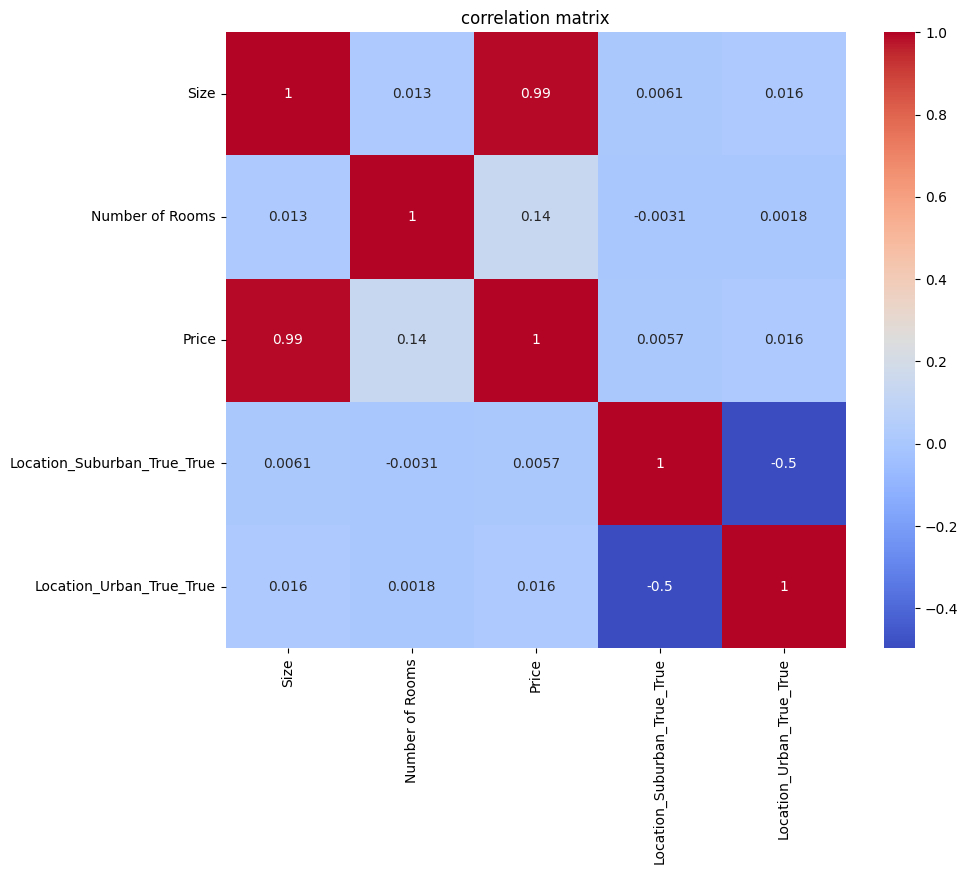

In [47]:
# 3.Feature Selection
# Using correlation analysis between the features
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix=dt.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [53]:
# 4.Model Training
# Train-Test Split
# Defining X and Y values
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

RMSE: 4.7276815258003566e-11
R²: 1.0


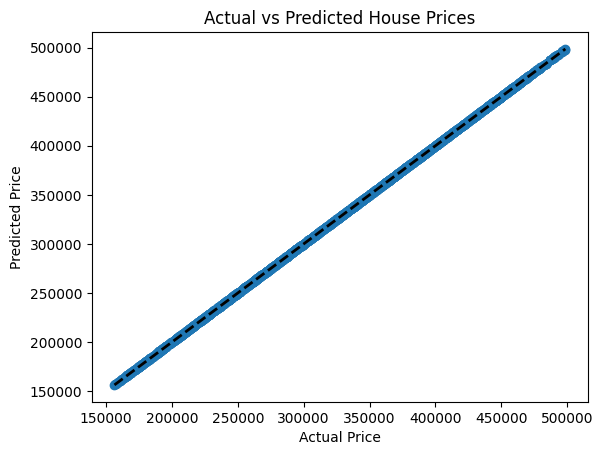

                              Coefficient
Size                         3.150000e+05
Number of Rooms              3.000000e+04
Location_Suburban_True_True  3.401640e-12
Location_Urban_True_True     5.307589e-12


In [54]:
# 3. Model Training
# Defining features (X) and target variable (y)
X = dt.drop('Price', axis=1)
y = dt['Price']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# 4. Model Evaluation
# Make predictions on the test data

y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R² (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Visualize the predicted vs. actual prices
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Feature Insights: Coefficients of the model (most important predictors)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)